In [1]:
#Imports

from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Read CSV

train_data = pd.read_csv("dataset/train_data_cleaned.csv")
train_data

,age,no_of_children,net_yearly_income,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,...,occupation_type_Low-skill Laborers,occupation_type_Managers,occupation_type_Medicine staff,occupation_type_Private service staff,occupation_type_Realty agents,occupation_type_Sales staff,occupation_type_Secretaries,occupation_type_Security staff,occupation_type_Unknown,occupation_type_Waiters/barmen staff
0,46,0.0,107934.04,1.0,1.0,33070.28,18690.93,73,544.0,2,...,0,0,0,0,0,0,0,0,1,0
1,29,0.0,109862.62,2.0,0.0,15329.53,37745.19,52,857.0,0,...,0,0,0,0,0,0,0,0,0,0
2,37,0.0,230153.17,2.0,0.0,48416.60,41598.36,43,650.0,0,...,0,0,0,0,0,0,0,0,0,0
3,39,0.0,122325.82,2.0,0.0,22574.36,32627.76,20,754.0,0,...,0,0,0,0,0,0,0,0,0,0
4,46,0.0,387286.00,1.0,0.0,38282.95,52950.64,75,927.0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43503,55,2.0,96207.57,4.0,0.0,11229.54,29663.83,82,907.0,0,...,0,0,0,0,0,0,0,0,1,0
43504,31,0.0,383476.74,2.0,1.0,43369.91,139947.16,32,679.0,0,...,0,0,0,0,0,0,0,0,0,0
43505,27,0.0,260052.18,2.0,0.0,22707.51,83961.83,46,727.0,0,...,0,0,0,0,0,0,0,0,0,0
43506,32,0.0,157363.04,2.0,0.0,20150.10,25538.72,92,805.0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
#Drop the default column

train_data_df = train_data.drop("credit_card_default", axis=1)

feature_names = train_data.columns
train_data_df

,age,no_of_children,net_yearly_income,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,...,occupation_type_Low-skill Laborers,occupation_type_Managers,occupation_type_Medicine staff,occupation_type_Private service staff,occupation_type_Realty agents,occupation_type_Sales staff,occupation_type_Secretaries,occupation_type_Security staff,occupation_type_Unknown,occupation_type_Waiters/barmen staff
0,46,0.0,107934.04,1.0,1.0,33070.28,18690.93,73,544.0,2,...,0,0,0,0,0,0,0,0,1,0
1,29,0.0,109862.62,2.0,0.0,15329.53,37745.19,52,857.0,0,...,0,0,0,0,0,0,0,0,0,0
2,37,0.0,230153.17,2.0,0.0,48416.60,41598.36,43,650.0,0,...,0,0,0,0,0,0,0,0,0,0
3,39,0.0,122325.82,2.0,0.0,22574.36,32627.76,20,754.0,0,...,0,0,0,0,0,0,0,0,0,0
4,46,0.0,387286.00,1.0,0.0,38282.95,52950.64,75,927.0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43503,55,2.0,96207.57,4.0,0.0,11229.54,29663.83,82,907.0,0,...,0,0,0,0,0,0,0,0,1,0
43504,31,0.0,383476.74,2.0,1.0,43369.91,139947.16,32,679.0,0,...,0,0,0,0,0,0,0,0,0,0
43505,27,0.0,260052.18,2.0,0.0,22707.51,83961.83,46,727.0,0,...,0,0,0,0,0,0,0,0,0,0
43506,32,0.0,157363.04,2.0,0.0,20150.10,25538.72,92,805.0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
#Target Credit default or no default

target = train_data["credit_card_default"]
target_names = ["no default", "default"]



In [5]:
#Train Test Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_data_df, target, random_state=42)

In [6]:
#Create the scaler

from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)


In [7]:
#Scale the data

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


<b>Decision Tree<b>
    

In [8]:
#Decision tree classifier

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train_scaled, y_train)
clf.score(X_test_scaled, y_test)

0.9728785510710674

In [9]:
#Create feature importances - decision tree

sorted(zip(clf.feature_importances_, feature_names), reverse=True)

[(0.7884634968093197, 'credit_score'),
 (0.0670338370996371, 'credit_limit_used(%)'),
 (0.03253542821628167, 'yearly_debt_payments'),
 (0.028444165493834772, 'credit_limit'),
 (0.024271916946549343, 'net_yearly_income'),
 (0.02048180014408773, 'age'),
 (0.006378701538106377, 'total_family_members'),
 (0.004463642686367428, 'no_of_children'),
 (0.002919794050834267, 'occupation_type_Security staff'),
 (0.0028919959611846185, 'occupation_type_Realty agents'),
 (0.0028148547735750975, 'gender_M'),
 (0.0026366903829190295, 'migrant_worker'),
 (0.002508355214769325, 'credit_card_default'),
 (0.002507038583441644, 'owns_car_Y'),
 (0.0022416730194963755, 'occupation_type_IT staff'),
 (0.0019235731659972843, 'occupation_type_Cooking staff'),
 (0.001708041210473075, 'occupation_type_Core staff'),
 (0.0016419986517885378, 'occupation_type_Low-skill Laborers'),
 (0.0011211032915742038, 'occupation_type_Secretaries'),
 (0.000816062558293728, 'occupation_type_Unknown'),
 (0.0007613769510352445, 'oc

Text(0, 0.5, '% of Importance')

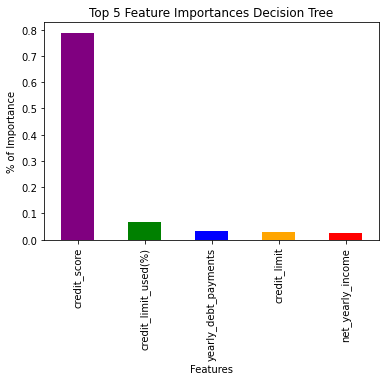

In [10]:
#Create feature importances graph - decision tree

feat_importances = pd.Series(clf.feature_importances_, index=X_train.columns)
feat_importances.nlargest(5).plot(kind='bar', color=['purple', 'green', 'blue', 'orange', 'red'])
plt.title("Top 5 Feature Importances Decision Tree")
plt.xlabel("Features")
plt.ylabel("% of Importance")


In [11]:
# Calculate classification report - decision tree
from sklearn.metrics import classification_report
predictions = clf.predict(X_test_scaled)
print(classification_report(y_test, predictions,
                            target_names=target_names))

              precision    recall  f1-score   support

  no default       0.99      0.98      0.99      9989
     default       0.83      0.84      0.84       888

    accuracy                           0.97     10877
   macro avg       0.91      0.91      0.91     10877
weighted avg       0.97      0.97      0.97     10877



<AxesSubplot:>

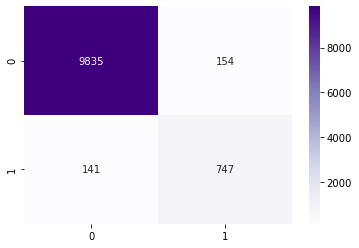

In [12]:
#Confusion matrix - decision tree

import seaborn as sns
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, predictions), cmap="Purples", 
        annot = True, fmt="d")

In [13]:
#Save the model - decision tree
import joblib

filename= 'saved_models/decision_tree_trained.joblib'
joblib.dump(clf, filename)

['saved_models/decision_tree_trained.joblib']

In [14]:
#Load the model - decision tree
loaded_model = joblib.load(filename)
print('Test Acc: %.3f' % loaded_model.score(X_test_scaled, y_test))

Test Acc: 0.973


<b>Random Forest<b>


In [15]:
feature_names1 = train_data_df.columns

target = train_data["credit_card_default"]
target_names1 = ["no default", "default"]


In [16]:
#Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train_scaled, y_train)
rf.score(X_test_scaled, y_test)

0.9808770800772272

In [17]:
#Create feature imporances Random Forest

sorted(zip(rf.feature_importances_, feature_names1), reverse=True)

[(0.4118951792432715, 'credit_score'),
 (0.20753701746508332, 'prev_defaults'),
 (0.15830942503560008, 'default_in_last_6months'),
 (0.07054447882775534, 'credit_limit_used(%)'),
 (0.028608686474547874, 'net_yearly_income'),
 (0.028595802238335383, 'yearly_debt_payments'),
 (0.02828197038516695, 'credit_limit'),
 (0.021577493611413857, 'age'),
 (0.007910723125595844, 'total_family_members'),
 (0.005417386575088733, 'no_of_children'),
 (0.0041593862298180285, 'owns_house_Y'),
 (0.00414161157169385, 'owns_car_Y'),
 (0.0031632445436395452, 'migrant_worker'),
 (0.0030601687939091557, 'gender_M'),
 (0.0021704234140820255, 'occupation_type_Laborers'),
 (0.002103669904729309, 'occupation_type_Unknown'),
 (0.0018363334386292131, 'occupation_type_Sales staff'),
 (0.0014495052699714964, 'occupation_type_Core staff'),
 (0.0014360568294724105, 'occupation_type_Drivers'),
 (0.0013614828790209376, 'occupation_type_Managers'),
 (0.0011113892542309503, 'occupation_type_Cooking staff'),
 (0.00105491971

Text(0, 0.5, '% of Importance')

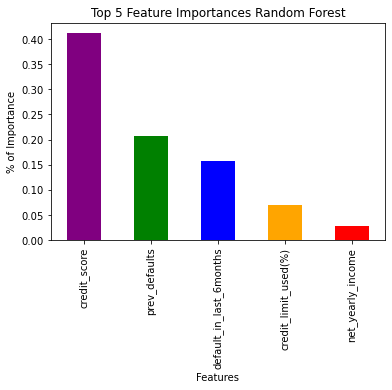

In [18]:
#Create graph of top 5 feature importances Random Forest

feat_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feat_importances.nlargest(5).plot(kind='bar', color=['purple', 'green', 'blue', 'orange', 'red'])
plt.title("Top 5 Feature Importances Random Forest")
plt.xlabel("Features")
plt.ylabel("% of Importance")




In [19]:
# Calculate classification report - random forest

from sklearn.metrics import classification_report
predictions1 = rf.predict(X_test_scaled)
print(classification_report(y_test, predictions1,
                            target_names=target_names))

              precision    recall  f1-score   support

  no default       0.98      1.00      0.99      9989
     default       1.00      0.77      0.87       888

    accuracy                           0.98     10877
   macro avg       0.99      0.88      0.93     10877
weighted avg       0.98      0.98      0.98     10877



<AxesSubplot:>

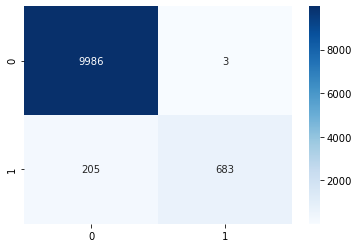

In [20]:
#Confusion matrix - random forest

import seaborn as sns
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, predictions1), cmap="Blues", 
        annot = True, fmt="d")

In [21]:
#Save the model - random forest

import joblib

filename1= 'saved_models/random_forest_trained.joblib'
joblib.dump(rf, filename1)

['saved_models/random_forest_trained.joblib']

In [22]:
#Load the model - random forest

loaded_model = joblib.load(filename1)
print('Test Acc: %.3f' % loaded_model.score(X_test_scaled, y_test))

Test Acc: 0.981


<b>Decision Tree Graph<b>

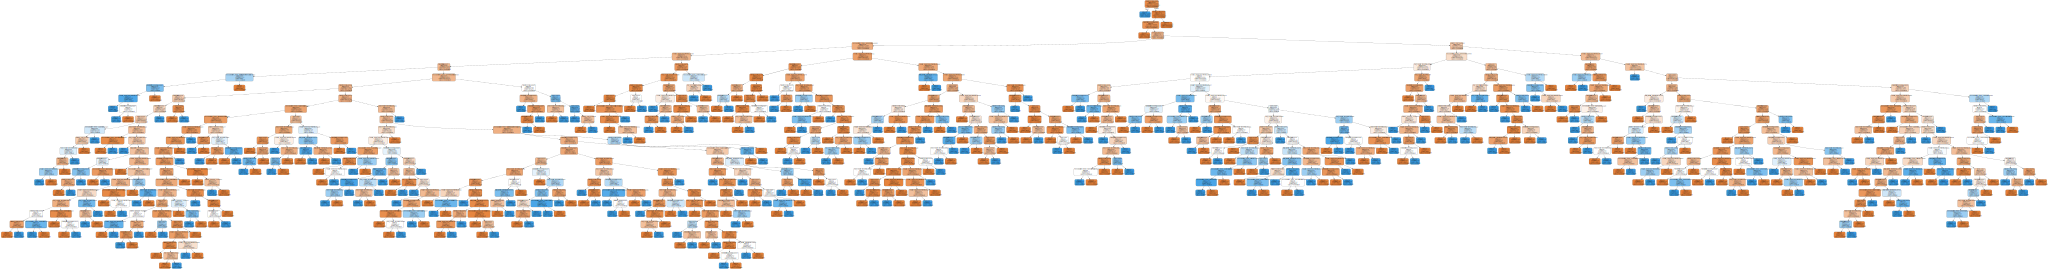

In [23]:
#Create decision tree graph

import graphviz 
dot_data = tree.export_graphviz(
    clf, out_file=None, 
    feature_names=feature_names1,  
    class_names=target_names1,  
    filled=True, rounded=True,  
    special_characters=True)  

import pydotplus
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('credit_decision_tree.png')

graph = graphviz.Source(dot_data)  
graph 